# Overlap images with python

This jupyter notebook shows the basic concept of the scikit.py python script.

In [1]:
#!/usr/bin/python
%matplotlib inline

import matplotlib.pyplot as plt
from skimage import exposure, io, util
from skimage.restoration import denoise_nl_means
from skimage.transform import rotate
import numpy as np


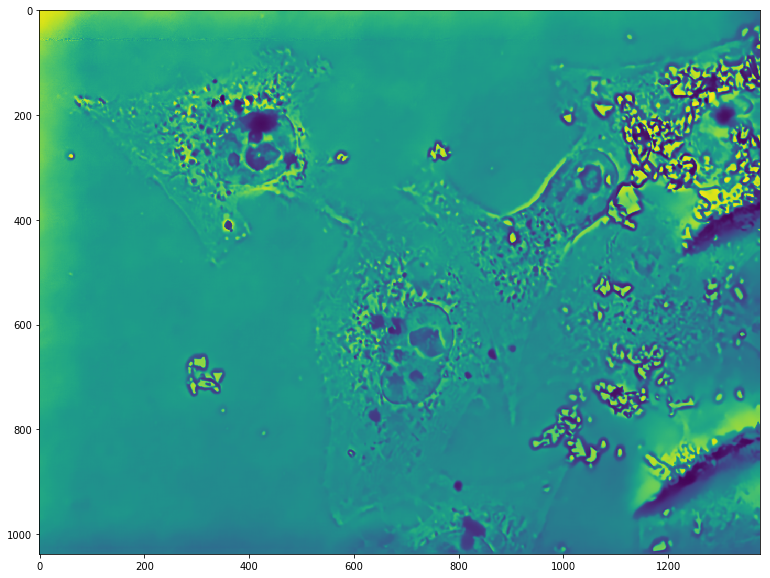

In [2]:
plt.figure(figsize=(20,10))
cell_img = io.imread("img/6_Cell.tif")

cell = exposure.equalize_adapthist(cell_img, clip_limit=0.03)
cell = denoise_nl_means(cell, 7, 9, 0.08, multichannel=True)

plt.imshow(cell)


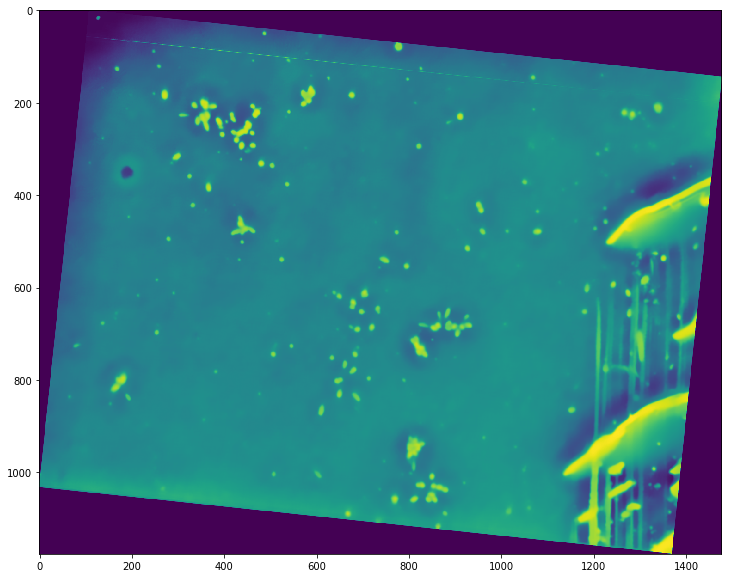

In [3]:
plt.figure(figsize=(20,10))
track_img = io.imread("img/6_Neutron.tif")
track_img = util.invert(track_img)

track = exposure.equalize_adapthist(track_img, clip_limit=0.03)
track = denoise_nl_means(track, 7, 9, 0.08, multichannel=True)
track = rotate(track,354,resize=True)

plt.imshow(track)

In [4]:
print len(cell)
print len(cell[1])

1038
1376


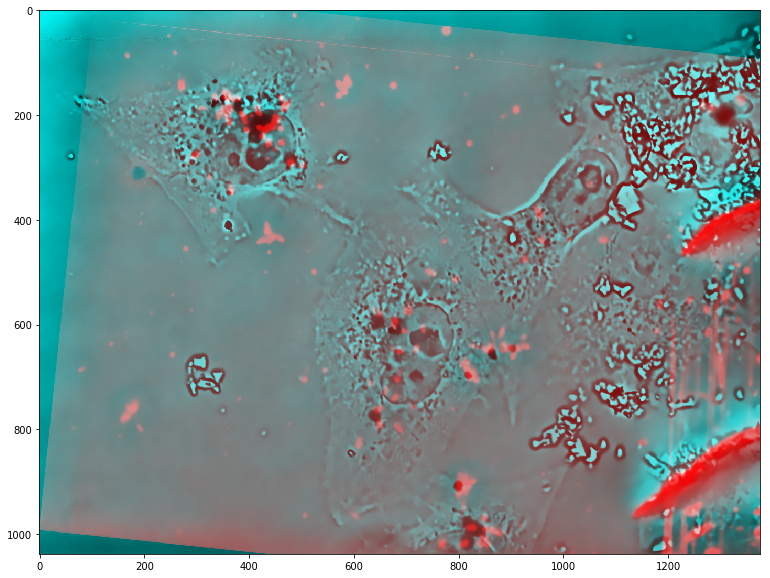

In [5]:
plt.figure(figsize=(20,10))
color_img = np.zeros((1177,1477,4),dtype="float32")
color_img[0:1177,0:1477,0] = track

#color_img[40:1078,0:1376,0]=cell
color_img[40:1078,0:1376,1]=cell
color_img[40:1078,0:1376,2]=cell
color_img[40:1078,0:1376,3]=np.full((1038,1376), 1)
plt.imshow(color_img[40:1078,0:1376])

plt.imsave("test.png",color_img[40:1078,0:1376])